<a href="https://colab.research.google.com/github/MichalSien/Zadania-Studenckie/blob/main/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout
from keras import optimizers
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

In [2]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()
mean = X_train.mean(axis=0)
X_train_n = X_train - mean
std = X_train_n.std(axis=0)
X_train /= std

X_test_n = X_test - mean
X_test_n /= std

meany = y_train.mean(axis=0)
y_train_n = y_train - meany
stdy = y_train_n.std(axis=0)
y_train /= stdy

y_test_n = y_test - meany
y_test_n /= stdy

In [3]:
from sklearn.preprocessing import StandardScaler
from keras import layers
scaler = StandardScaler()

# first we fit the scaler on the training dataset
scaler.fit(X_train_n)

# then we call the transform method to scale both the training and testing data
X_train_scaled = scaler.transform(X_train_n)
X_test_scaled = scaler.transform(X_test_n)

model = Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=[X_train.shape[1]]))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='linear'))
model.compile(optimizer='rmsprop',
                       loss='mse',
                       metrics=['mae'])

In [4]:
history = model.fit(X_train_scaled, y_train_n, validation_split=0.2, epochs=150)

Epoch 1/150
11/11 [==============================] - 2s 37ms/step - loss: 86.1559 - mae: 6.7435 - val_loss: 88.2797 - val_mae: 6.7094
Epoch 2/150
11/11 [==============================] - 0s 8ms/step - loss: 83.2851 - mae: 6.6092 - val_loss: 85.3978 - val_mae: 6.5619
Epoch 3/150
11/11 [==============================] - 0s 8ms/step - loss: 80.7755 - mae: 6.4932 - val_loss: 83.2571 - val_mae: 6.4445
Epoch 4/150
11/11 [==============================] - 0s 10ms/step - loss: 78.5565 - mae: 6.3821 - val_loss: 81.0251 - val_mae: 6.3222
Epoch 5/150
11/11 [==============================] - 0s 15ms/step - loss: 76.1713 - mae: 6.2615 - val_loss: 79.0964 - val_mae: 6.2061
Epoch 6/150
11/11 [==============================] - 0s 8ms/step - loss: 73.9077 - mae: 6.1430 - val_loss: 77.0071 - val_mae: 6.0799
Epoch 7/150
11/11 [==============================] - 0s 8ms/step - loss: 71.4946 - mae: 6.0110 - val_loss: 74.5963 - val_mae: 5.9286
Epoch 8/150
11/11 [==============================] - 0s 8ms/step -

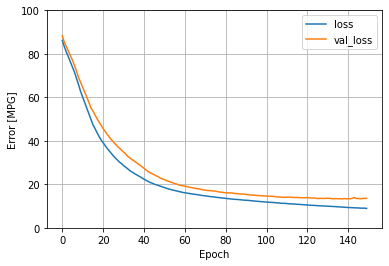

In [14]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 100])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

In [6]:
results = model.evaluate(X_test_n, y_test_n)

print('loss test data: ', results[0])
print('mse test data: ', results[1])

results = model.evaluate(X_train_n, y_train_n)

print('loss train data: ', results[0])
print('mse train data: ', results[1])

4/4 [==============================] - 0s 3ms/step - loss: 51.9713 - mae: 5.4370
loss test data:  51.97134780883789
mse test data:  5.436978340148926
13/13 [==============================] - 0s 2ms/step - loss: 43358.0391 - mae: 175.5007
loss train data:  43358.0390625
mse train data:  175.50067138671875
